In [ ]:
import pandas as pd
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22, 
 'figure.titlesize': 24
 }
pylab.rcParams.update(params)

In [ ]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


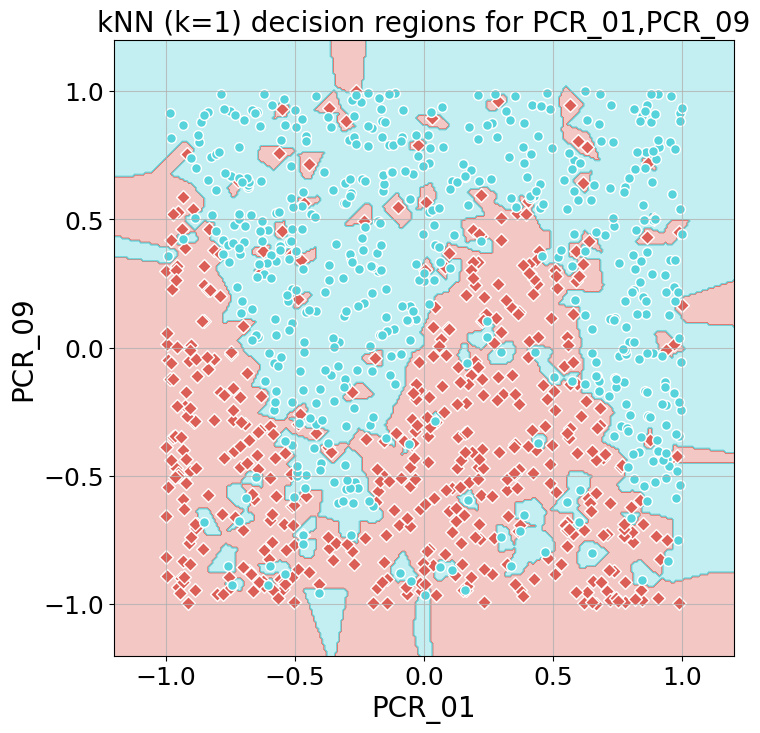

In [ ]:
# Q1
from sklearn.neighbors import KNeighborsClassifier

# Creating temporary DataFrame of PCR_01, PCR_09 fields of preprocessed training set
df = pd.read_csv("./train_preprocessed.csv")
tmp_df = df[['PCR_01','PCR_09','spread']].copy()

# Creating kNN model with k=1
tmp_df_X = tmp_df[['PCR_01','PCR_09']].copy()
tmp_df_Y = tmp_df['spread'].copy()
kNN_model = KNeighborsClassifier(n_neighbors=1)
kNN_model.fit(tmp_df_X, tmp_df_Y)

# Visualizing the model using visualize_clf
visualize_clf(kNN_model, tmp_df_X, tmp_df_Y, "kNN (k=1) decision regions for PCR_01,PCR_09", "PCR_01", "PCR_09")

The index of the best validation accuracy is: 5
The k for the best validation accuracy is: 11
The best validation accuracy is: 0.869
The training accuracy for the best validation accuracy is: 0.875


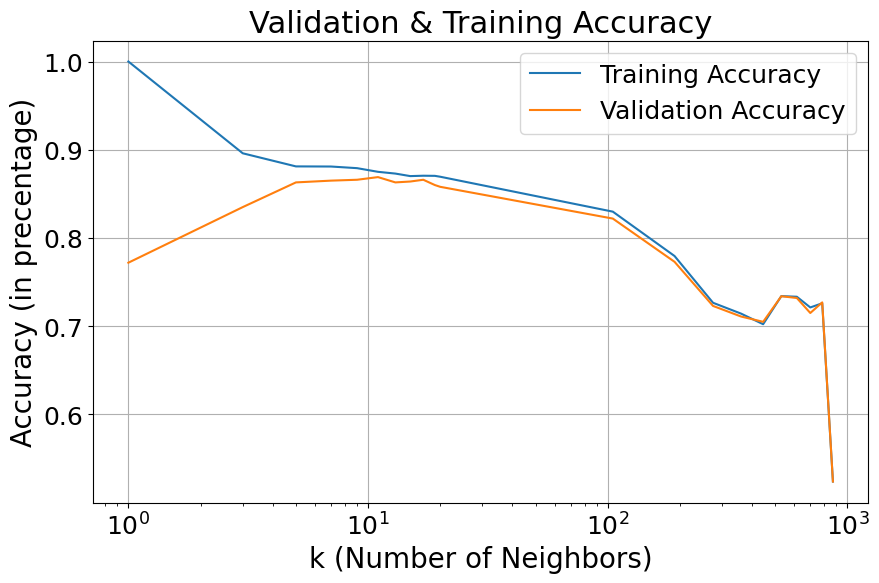

In [ ]:
# Q2
from sklearn.model_selection import cross_validate

#Creating the list for the k values and the train/val accuracy lists
k_range = list(range(1, 20, 2)) + list(range(20, 871, 85))
mean_training_accs = []
validation_accs = []


#Looping through the k values, and using cross validation to find the best k
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  cv_results = cross_validate(knn, tmp_df_X, tmp_df_Y, cv=8, return_train_score=True)
  mean_train_score = np.mean(cv_results['train_score'])
  mean_val_score = np.mean(cv_results['test_score'])
  mean_training_accs.append(mean_train_score)
  validation_accs.append(mean_val_score)

#Plotting the results and creating the graph
plt.figure(figsize=(10, 6))
plt.semilogx(k_range, mean_training_accs, label='Training Accuracy')
plt.semilogx(k_range, validation_accs, label='Validation Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (in precentage)')
plt.title('Validation & Training Accuracy')
plt.legend()
plt.grid(True)

max_index = validation_accs.index(max(validation_accs))
#Printing the values
print("The index of the best validation accuracy is:", max_index)
print("The k for the best validation accuracy is:", k_range[max_index])
print("The best validation accuracy is:", validation_accs[max_index])
print("The training accuracy for the best validation accuracy is:", mean_training_accs[max_index])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


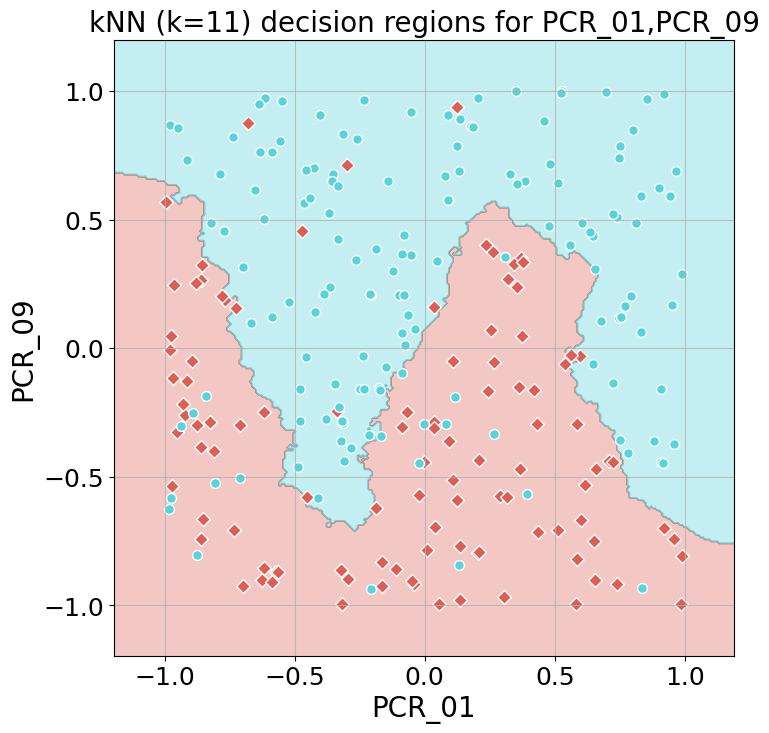

Accuracy: 0.884


In [ ]:
#Q4
from sklearn.metrics import accuracy_score

# Creating temporary DataFrame of PCR_01, PCR_09 fields of preprocessed training set
test_df = pd.read_csv("./test_preprocessed.csv")
train_df = pd.read_csv("./train_preprocessed.csv")

test_df = test_df[['PCR_01','PCR_09','spread']].copy()
train_df = train_df[['PCR_01','PCR_09','spread']].copy()

# Creating kNN model with k=11
train_df_X = train_df[['PCR_01','PCR_09']].copy()
train_df_Y = train_df['spread'].copy()
test_df_X = test_df[['PCR_01','PCR_09']].copy()
test_df_Y = test_df[['spread']].copy()

kNN_model = KNeighborsClassifier(n_neighbors=11)
kNN_model.fit(train_df_X, train_df_Y)
test_Y_pred = kNN_model.predict(test_df_X)

# Visualizing the model using visualize_clf
visualize_clf(kNN_model, test_df_X, test_df_Y, "kNN (k=11) decision regions for PCR_01,PCR_09", "PCR_01", "PCR_09")

# Printing the score
accuracy = accuracy_score(test_df_Y, test_Y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


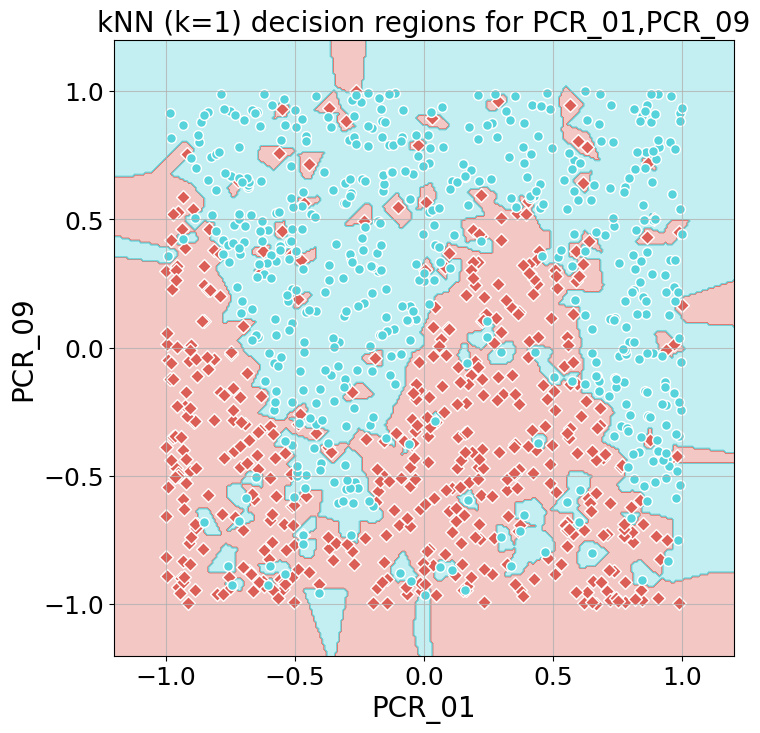

In [ ]:
# Q5
# kNN model with k=1
kNN1_model = KNeighborsClassifier(n_neighbors=1)
kNN1_model.fit(train_df_X, train_df_Y)

# Visualizing the model using visualize_clf
visualize_clf(kNN1_model, train_df_X, train_df_Y, "kNN (k=1) decision regions for PCR_01,PCR_09", "PCR_01", "PCR_09")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


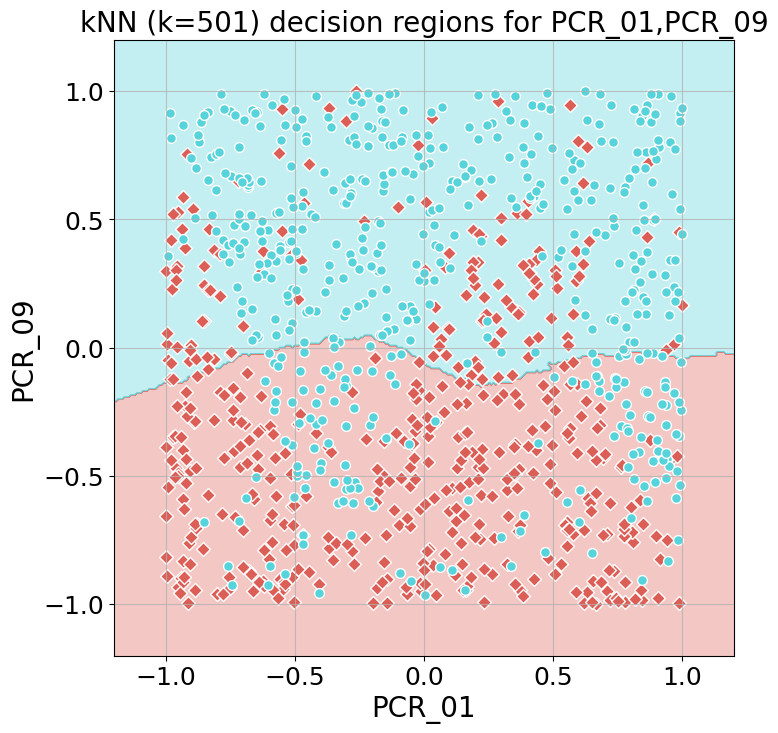

In [ ]:
# kNN model with k=501
kNN501_model = KNeighborsClassifier(n_neighbors=501)
kNN501_model.fit(train_df_X, train_df_Y)

# Visualizing the model using visualize_clf
visualize_clf(kNN501_model, train_df_X, train_df_Y, "kNN (k=501) decision regions for PCR_01,PCR_09", "PCR_01", "PCR_09")

The index of the best validation accuracy is: 11
The k for the best validation accuracy is: 105
The best validation accuracy is: 0.694
The training accuracy for the best validation accuracy is: 0.7027142857142856


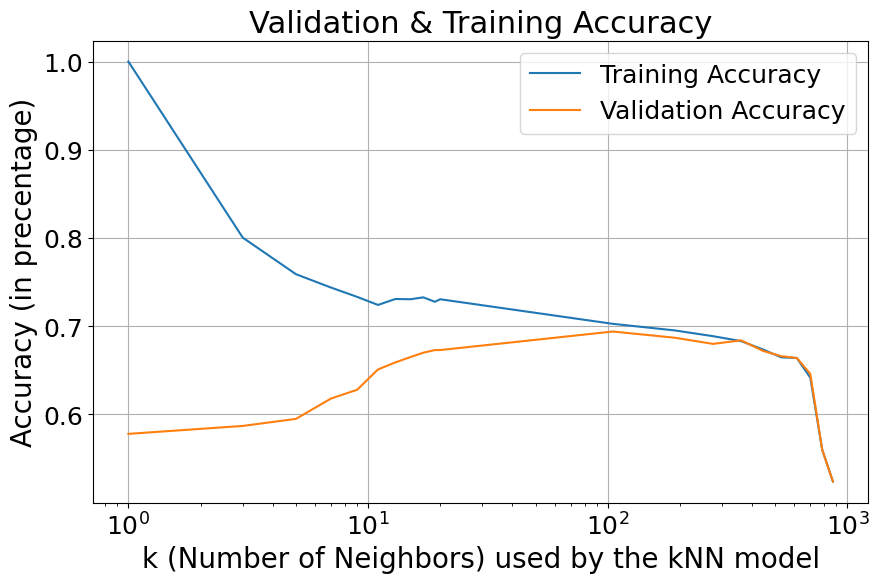

In [ ]:
# Q6
# Creating temporary DataFrame of PCR_01, PCR_09 fields of preprocessed training set
df = pd.read_csv("./train_preprocessed.csv")
df_Y = df['spread'].copy()
df_X = df.drop(['Unnamed: 0','risk','spread'], axis = 1).copy()

#Creating the list for the k values and the train/val acuuracy lists
k_range = list(range(1, 20, 2)) + list(range(20, 871, 85))
mean_training_accs = []
validation_accs = []

#Looping through the k values, and using cross validation to find the best k
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  cv_results = cross_validate(knn, df_X, df_Y, cv=8, return_train_score=True)
  mean_train_score = np.mean(cv_results['train_score'])
  mean_val_score = np.mean(cv_results['test_score'])
  mean_training_accs.append(mean_train_score)
  validation_accs.append(mean_val_score)

#Plotting the results and creating the graph
plt.figure(figsize=(10, 6))
plt.semilogx(k_range, mean_training_accs, label='Training Accuracy')
plt.semilogx(k_range, validation_accs, label='Validation Accuracy')
plt.xlabel('k (Number of Neighbors) used by the kNN model')
plt.ylabel('Accuracy (in precentage)')
plt.title('Validation & Training Accuracy')
plt.legend()
plt.grid(True)

max_index = validation_accs.index(max(validation_accs))
#Printing the values
print("The index of the best validation accuracy is:", max_index)
print("The k for the best validation accuracy is:", k_range[max_index])
print("The best validation accuracy is:", validation_accs[max_index])
print("The training accuracy for the best validation accuracy is:", mean_training_accs[max_index])

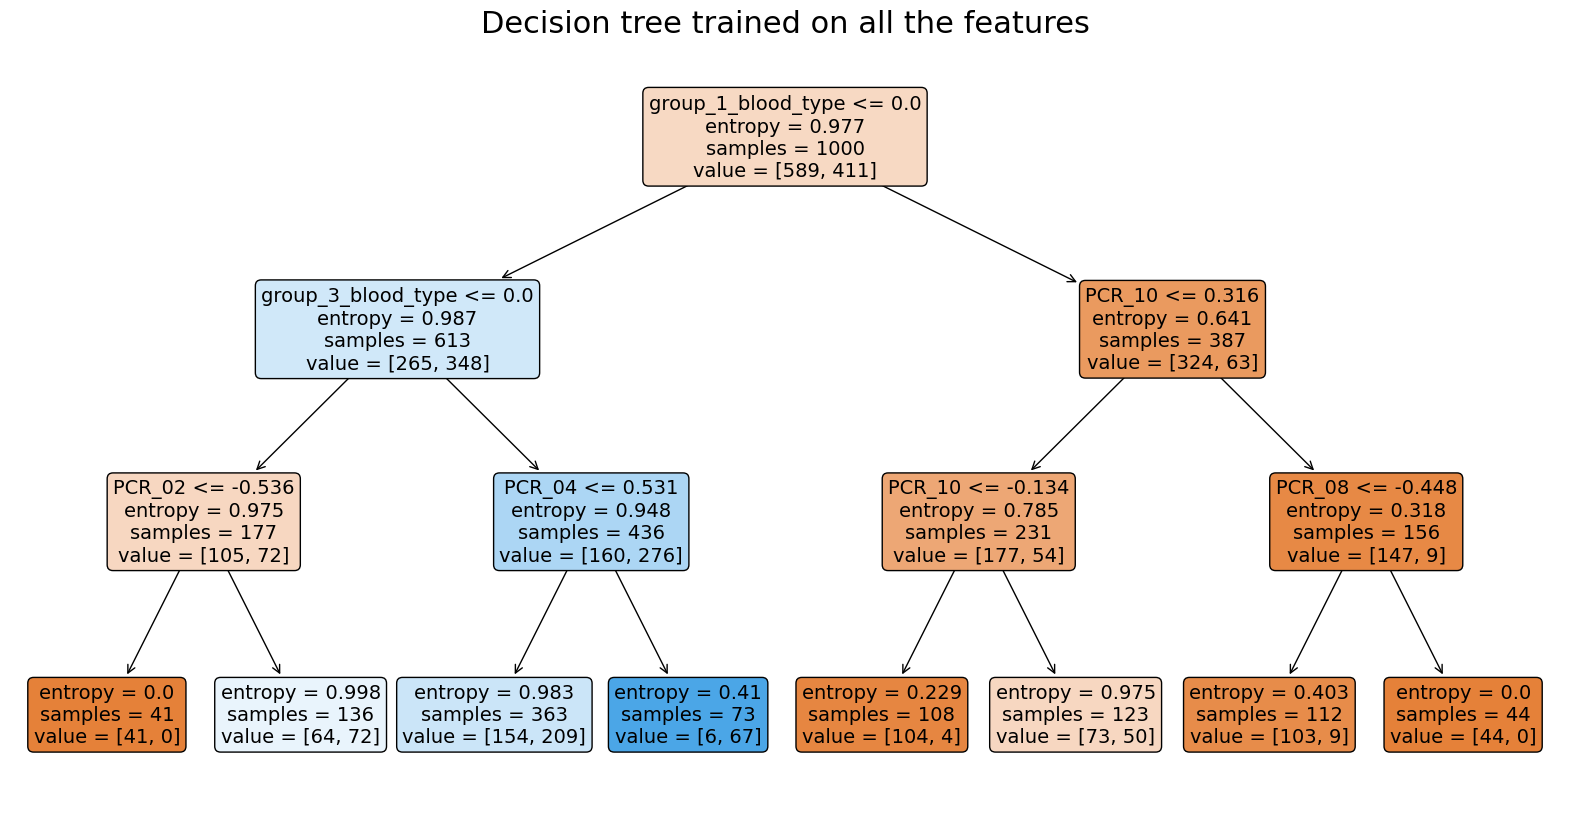

In [ ]:
# Q7
from sklearn.tree import DecisionTreeClassifier, plot_tree

df = pd.read_csv("./train_preprocessed.csv")
df = df.drop(['spread'], axis=1).copy()
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Fit the decision tree to all the preprocessed training data
df_X = df.drop(['risk'], axis=1).copy()
df_Y = df['risk'].copy()
decision_tree_classifier.fit(df_X,df_Y)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_classifier, filled=True, fontsize=14, feature_names=df_X.columns, rounded=True)
plt.title("Decision tree trained on all the features")
plt.show()

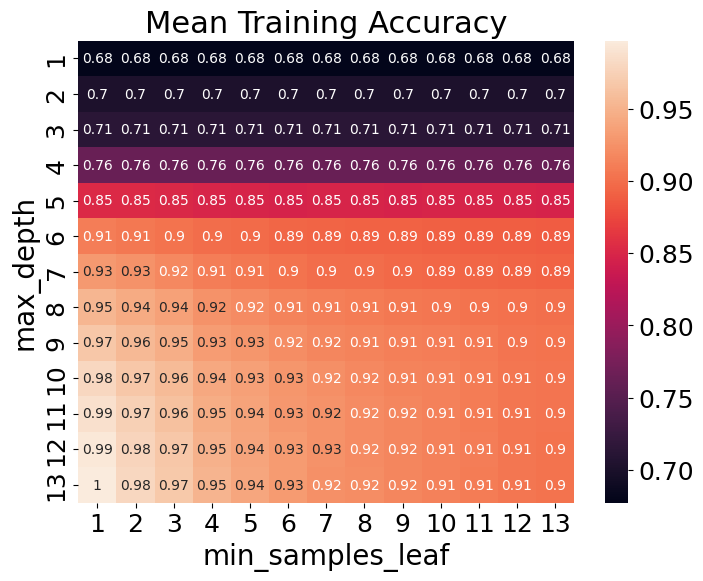

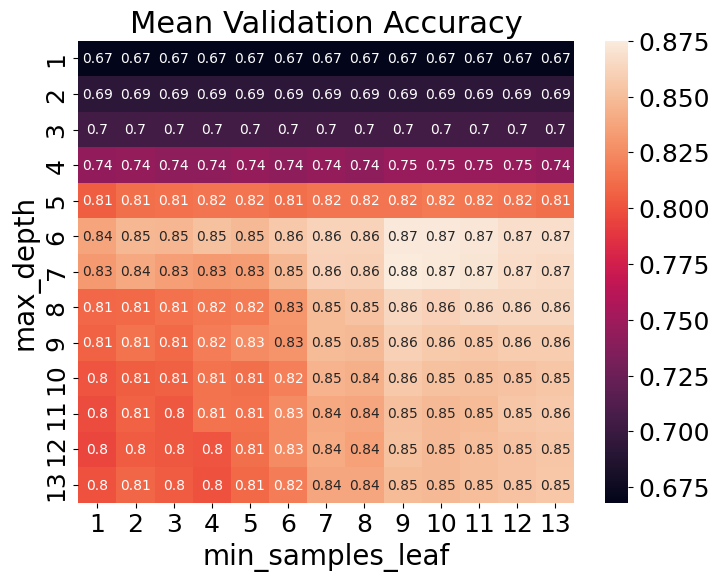

In [ ]:
# Q8
from sklearn.model_selection import GridSearchCV

# Creating the classifier with ranges
dtc = DecisionTreeClassifier(criterion="entropy")
max_depth_range = list(range(1,14))
min_samples_leaf_range = list(range(1,14))
hyperparameters = {"max_depth": max_depth_range, "min_samples_leaf": min_samples_leaf_range} 

# 8-fold cross validation for both hyperparamters: max_depth, min_samples_leaf
grid = GridSearchCV(dtc, hyperparameters, cv=8, scoring='accuracy', return_train_score = True)
grid.fit(df_X,df_Y)

# Obtain the results from GridSearchCV
cv_results = pd.DataFrame(grid.cv_results_)
train_accuracy = np.array(cv_results['mean_train_score']).reshape(len(hyperparameters["max_depth"]), len(hyperparameters["min_samples_leaf"]))
validation_accuracy = np.array(cv_results['mean_test_score']).reshape(len(hyperparameters["max_depth"]), len(hyperparameters["min_samples_leaf"]))

# Visualize of the hyperparameters result of the 8-fold using Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_accuracy, annot=True, xticklabels=hyperparameters['min_samples_leaf'], yticklabels=hyperparameters['max_depth'])
plt.title('Mean Training Accuracy')
plt.ylabel('max_depth')
plt.xlabel('min_samples_leaf')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(validation_accuracy, annot=True, xticklabels=hyperparameters['min_samples_leaf'], yticklabels=hyperparameters['max_depth'])
plt.title('Mean Validation Accuracy')
plt.ylabel('max_depth')
plt.xlabel('min_samples_leaf')
plt.show()

In [ ]:
# Q9
# Creating the decision tree with the optimal hyperparameters
optimal_max_depth = 6
optimal_min_samples_leaf = 9
decision_tree_opt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=optimal_max_depth, min_samples_leaf=optimal_min_samples_leaf)

# Fitting (all) the training set
decision_tree_opt_classifier.fit(df_X,df_Y)

# Predict the test set
predict_df = pd.read_csv("./test_preprocessed.csv")
predict_df_X = predict_df.drop(['spread','risk'], axis=1).copy()
original_df_Y = predict_df['risk'].copy() # for comparing with the model
test_accuracy = decision_tree_opt_classifier.score(predict_df_X,original_df_Y)
print("The model's accuracy for the test set is: ", test_accuracy)

The model's accuracy for the test set is:  0.836


In [ ]:
# Tasks before Part 3

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        loss = 0.0

        # Computing the loss
        linear_part = 1 - hinge_inputs
        max_part = np.maximum(0,linear_part)
        sum_part = np.sum(max_part)
        loss = norm * norm + (C * sum_part)
        
        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        g_w = None
        g_b = 0.0

        # Computing sub-gradient of b
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))
        sign = np.sign(hinge_inputs - 1) - (hinge_inputs - 1 > 0).astype(int)
        g_b_in_sum = np.multiply(sign, y.reshape(-1, 1))
        g_b = np.sum(g_b_in_sum) * C

        # Computing sub-gradient of w
        g_b_in_sum_with_x = np.multiply(g_b_in_sum, X)
        g_w_sum_part = np.sum(g_b_in_sum_with_x, axis=0) * C
        g_w = g_w_sum_part + 2 * w
        
        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]
        
        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            self.w = self.w - self.lr * g_w
            self.b = self.b - self.lr * g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        y_pred = None
        margins = (X.dot(self.w) + self.b).reshape(-1,1)
        y_pred = np.sign(margins) + (margins == 0).astype(int)
        return y_pred


In [ ]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)      
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


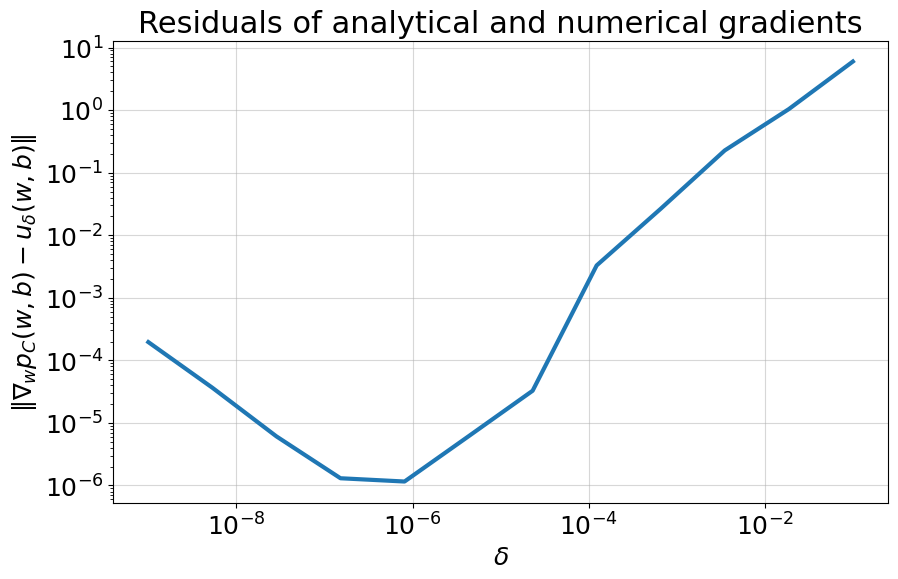

In [ ]:
# Q10
df_train = pd.read_csv("./train_preprocessed.csv")
X_train = df_train[['PCR_01','PCR_09']].to_numpy()
Y_train = df_train[['spread']].to_numpy()

compare_gradients(X_train, Y_train, deltas=np.logspace(-9, -1, 12))

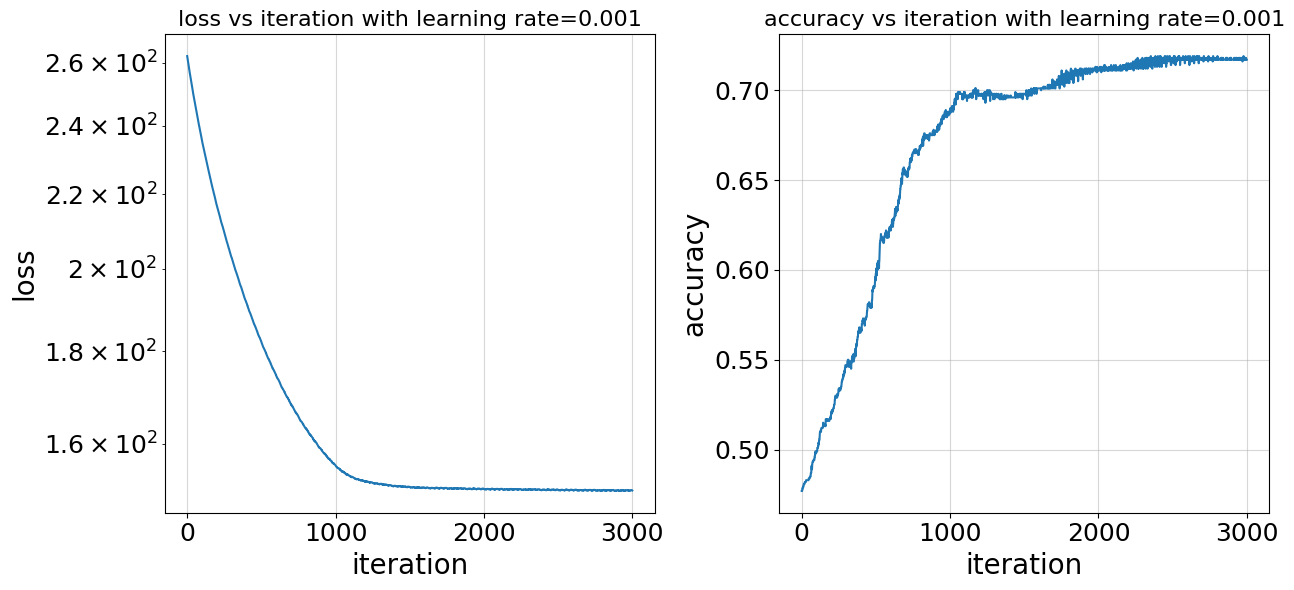

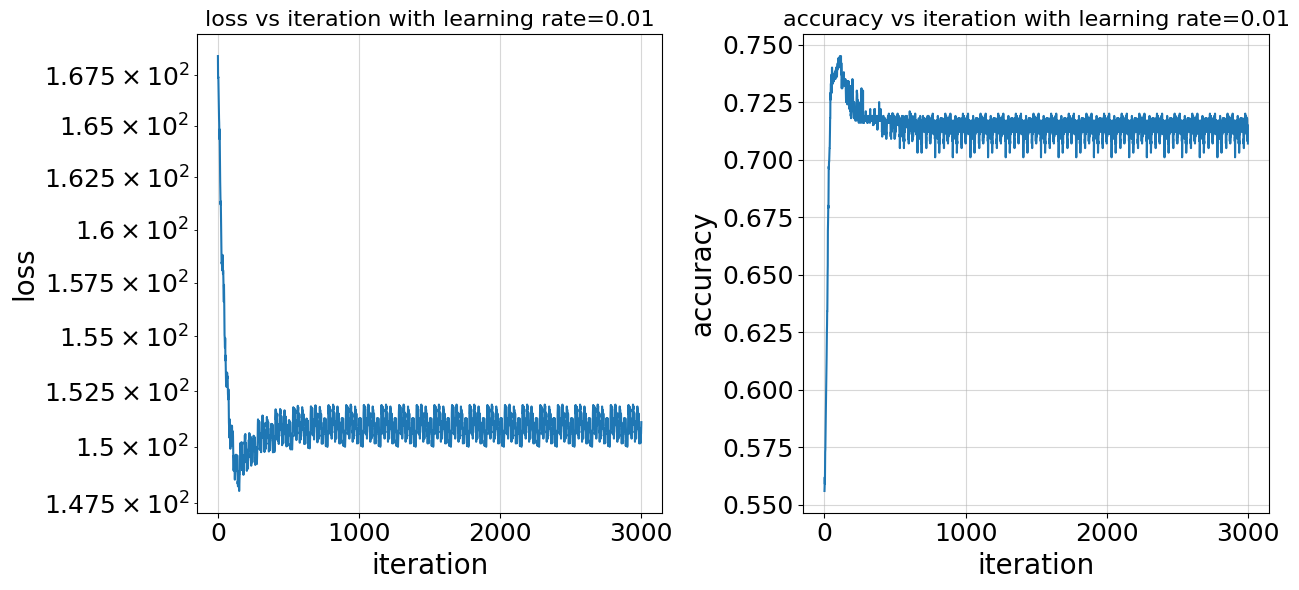

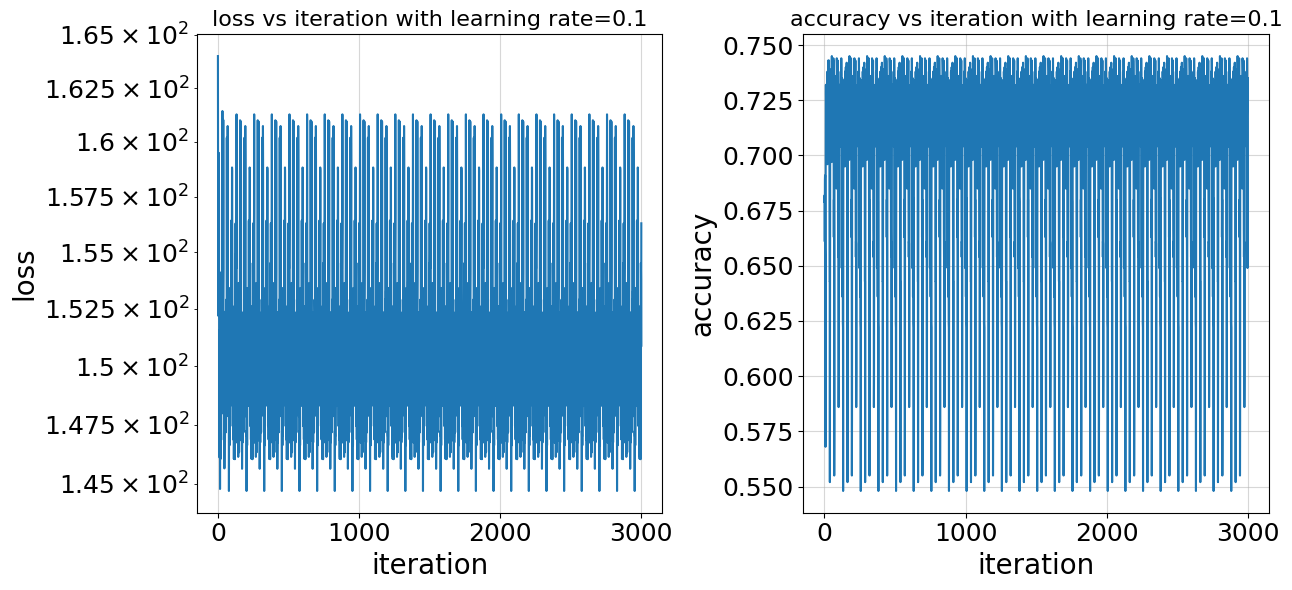

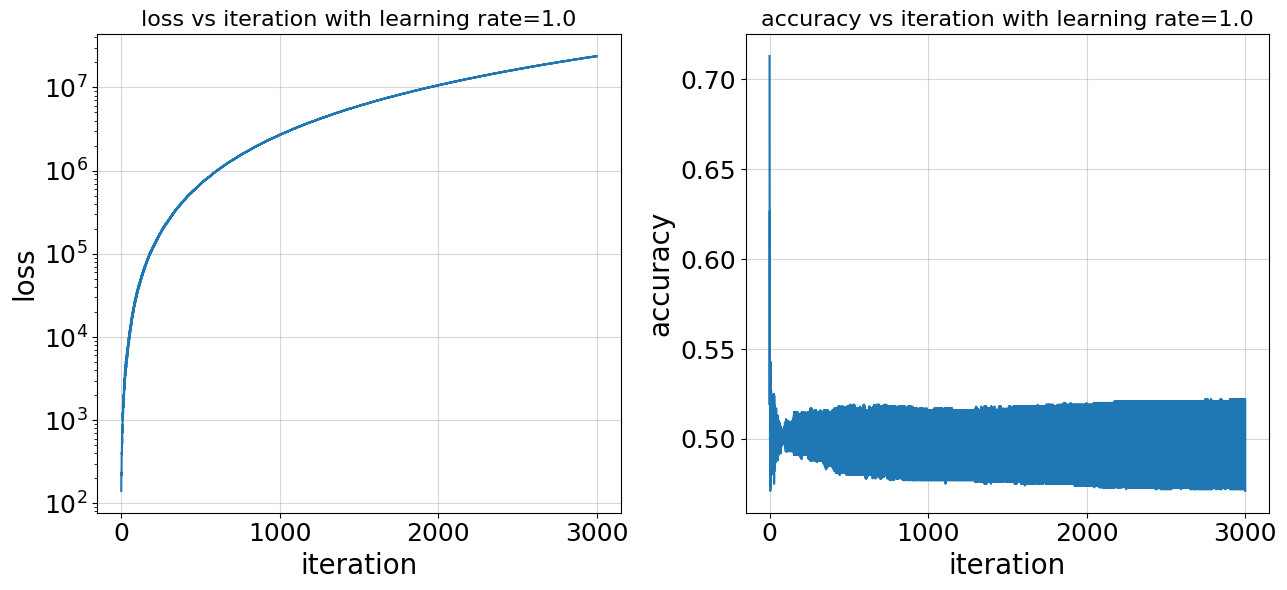

In [ ]:
# Task before Q11
df_train = pd.read_csv("./train_preprocessed.csv")
X_train = df_train[['PCR_01','PCR_09']].to_numpy()
Y_train = df_train[['spread']].to_numpy()

lrs = np.logspace(-3, 0, 4)
for lr in lrs:
  clf = SoftSVM(C=0.2, lr=lr)
  losses, accuracies = clf.fit_with_logs(X_train, Y_train, max_iter=3000)
  plt.figure(figsize=(13, 6))
  plt.subplot(121), plt.grid(alpha=0.5), plt.title (f"loss vs iteration with learning rate={lr}", fontsize=16)
  plt.semilogy(losses), plt.xlabel("iteration"), plt.ylabel("loss")
  plt.subplot(122), plt.grid(alpha=0.5), plt.title (f"accuracy vs iteration with learning rate={lr}", fontsize=16)
  plt.plot(accuracies), plt.xlabel("iteration"), plt.ylabel("accuracy")
  plt.tight_layout()

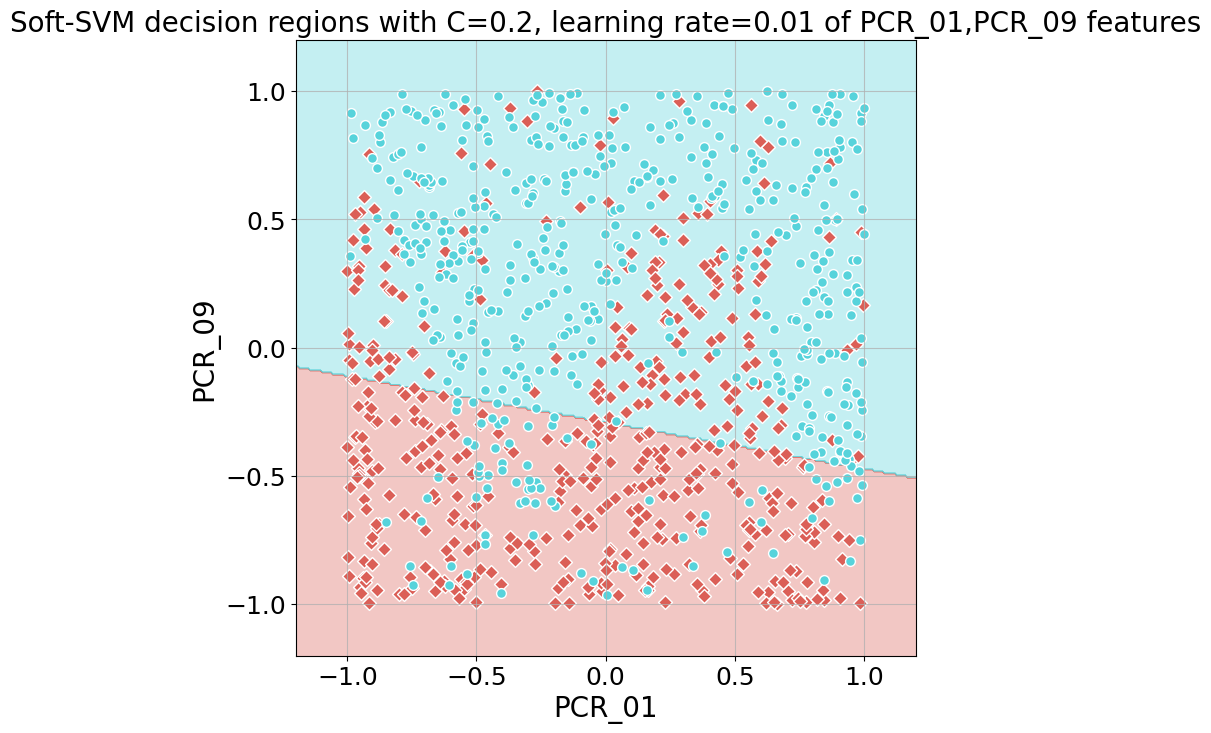

In [ ]:
# Q11,b
svm = SoftSVM(0.2,0.01)
svm.fit(X_train,Y_train)
visualize_clf(svm,X_train,Y_train,"Soft-SVM decision regions with C=0.2, learning rate=0.01 of PCR_01,PCR_09 features","PCR_01","PCR_09")

In [ ]:
# Q11,c
clf = SoftSVM(C=0.2, lr=0.01)
losses, accuracies = clf.fit_with_logs(X_train, Y_train, max_iter=3000)
loss_ind = np.argmin(losses)
acc_ind = np.argmax(accuracies)
print(f"minimal loss acheieved on step {loss_ind} with {losses[loss_ind]} minimal loss")
print(f"maximal accuracy acheieved on step {acc_ind} with {accuracies[acc_ind]} maximal accuracy")

minimal loss acheieved on step 751 with 149.05846027843708 minimal loss
maximal accuracy acheieved on step 721 with 0.724 maximal accuracy


In [ ]:
# Task before Q13
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

C = 1e13
svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(degree=3)),('scaler', StandardScaler()), ('SVM', SoftSVM(C=C, lr=(1/(C*5e2))))])
svm_clf.fit(X_train, Y_train, SVM__max_iter=10000)

Pipeline(steps=[('feature_mapping', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('SVM', SoftSVM(C=10000000000000.0, lr=2e-16))])

In [ ]:
# Find test & train accuracies
df_test = pd.read_csv("./test_preprocessed.csv")
X_test = df_test[['PCR_01','PCR_09']].to_numpy()
Y_test = df_test[['spread']].to_numpy()

train_acc = svm_clf.score(X_train,Y_train)
test_acc = svm_clf.score(X_test,Y_test)

print(f"Training accuracy {train_acc}")
print(f"Test accuracy {test_acc}")

Training accuracy 0.839
Test accuracy 0.824


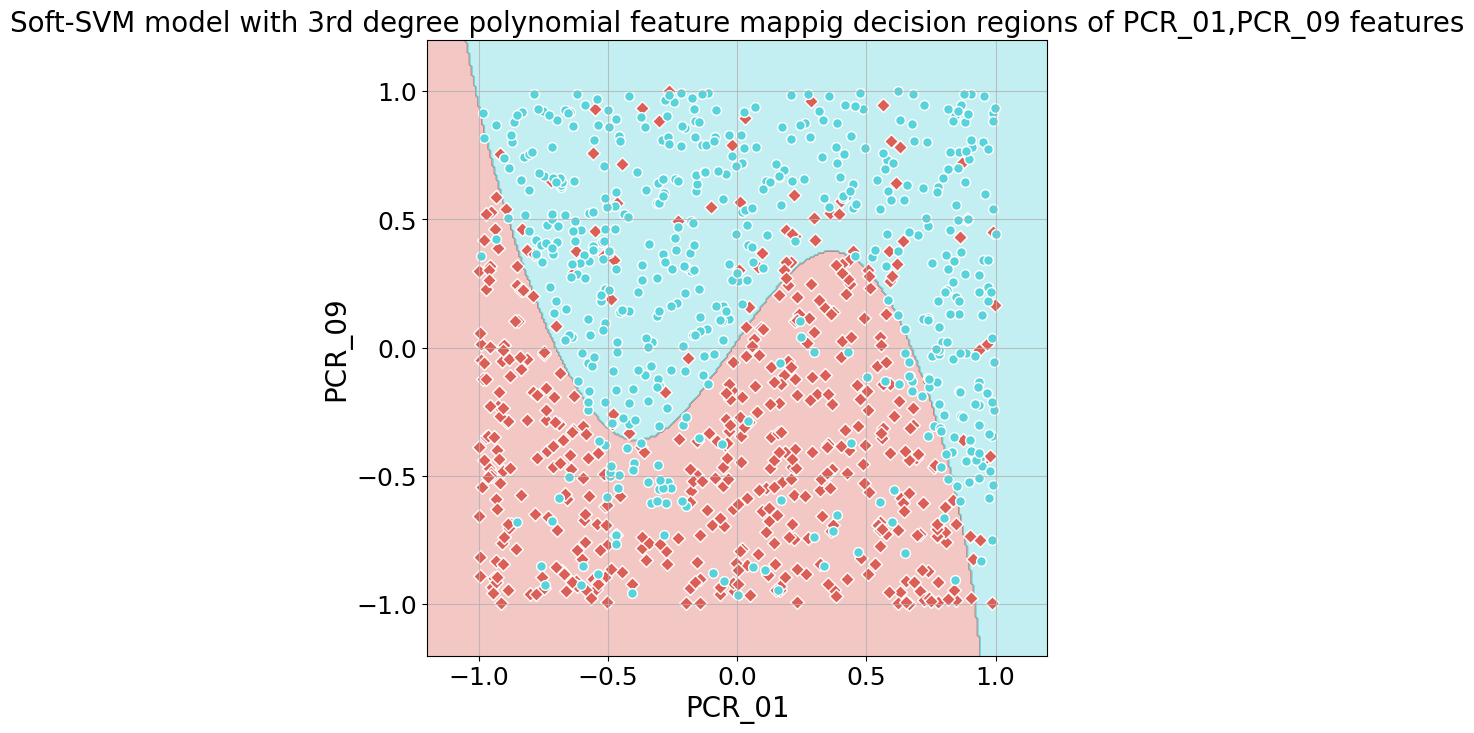

In [ ]:
# Visualize the decision regions of the Soft-SVM model with polynomial feature mapping
visualize_clf(svm_clf,X_train,Y_train,"Soft-SVM model with 3rd degree polynomial feature mappig decision regions of PCR_01,PCR_09 features", 
              "PCR_01","PCR_09")

In [ ]:
# Q14
accs = [0] * 5

for i in range(0,5):
  C = 1e13
  svm_clf_i = Pipeline([('feature_mapping', PolynomialFeatures(degree=3)),('scaler', StandardScaler()), ('SVM', SoftSVM(C=C, lr=(1/(C*5e2))))])
  svm_clf_i.fit(X_train, Y_train, SVM__max_iter=10000)
  accs[i] = svm_clf_i.score(X_train,Y_train)

print(f"The 5 resulting train accuracies are: {accs}")
print(f"The mean: {np.mean(accs)}")
print(f"The standard deviation: {np.std(accs)}")

The 5 resulting train accuracies are: [0.838, 0.838, 0.837, 0.838, 0.837]
The mean: 0.8375999999999999
The standard deviation: 0.000489897948556636


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


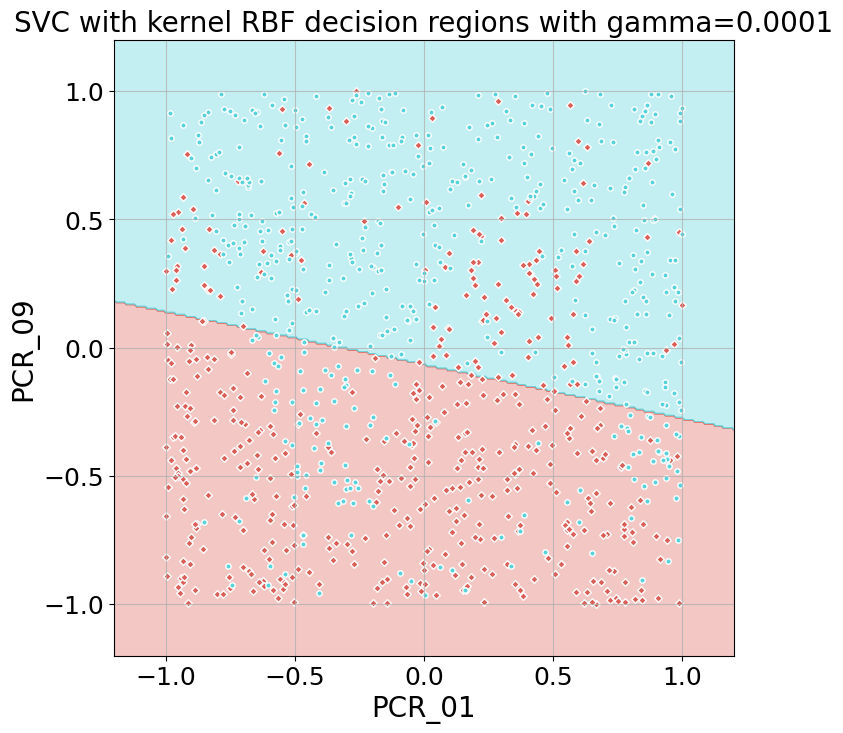

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


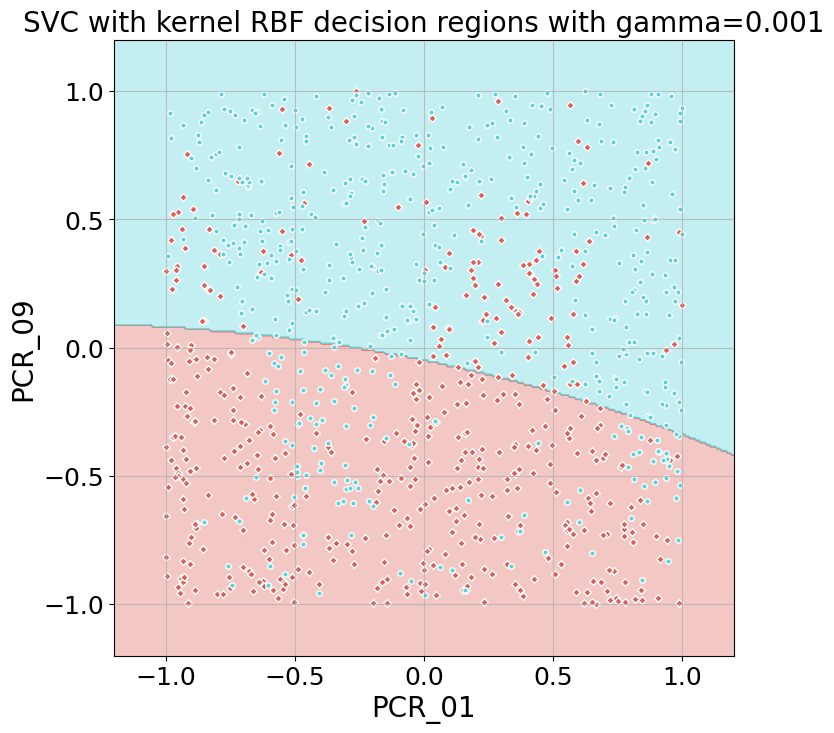

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


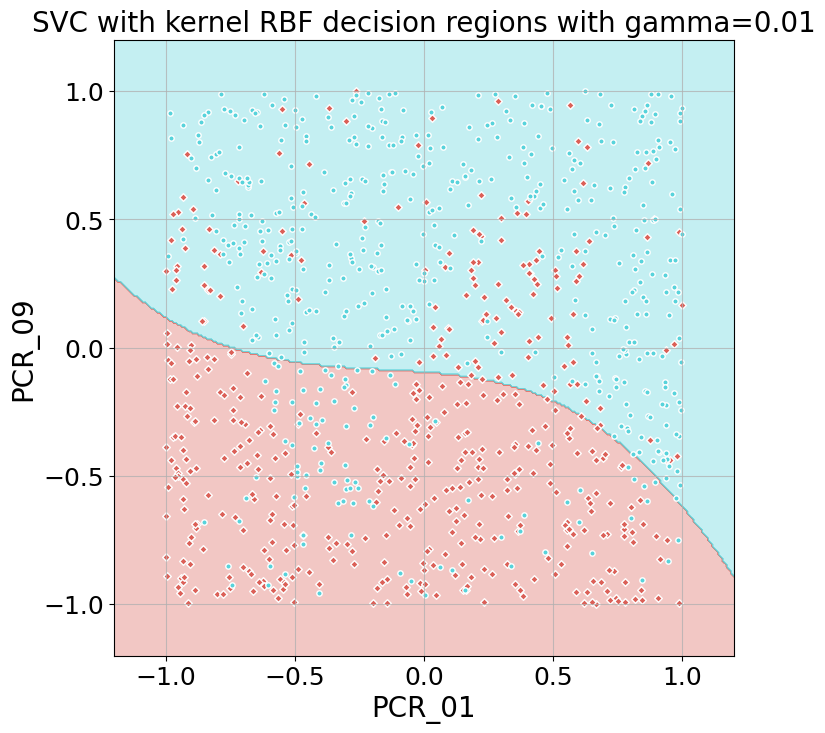

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


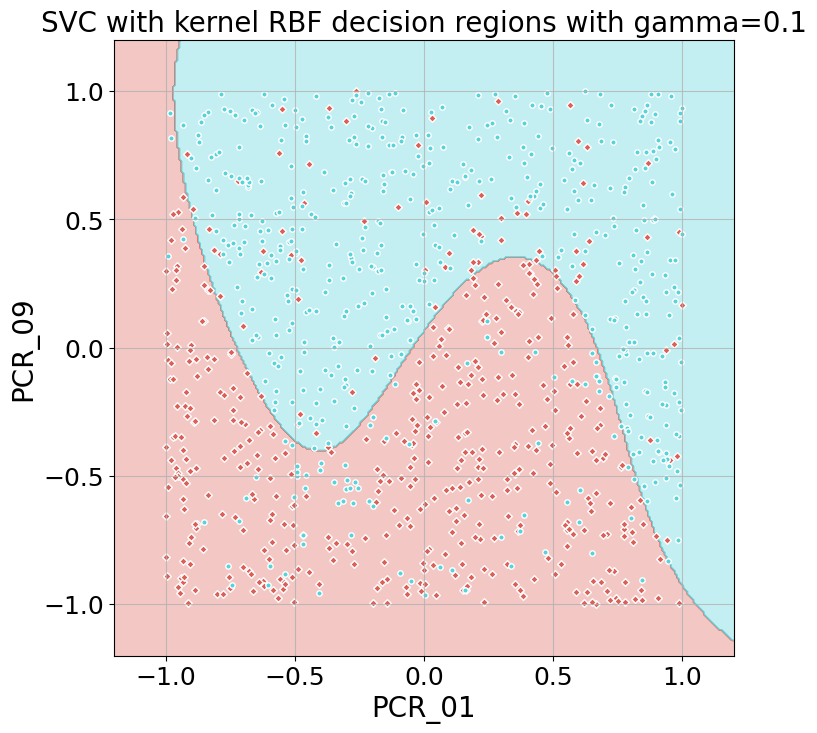

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


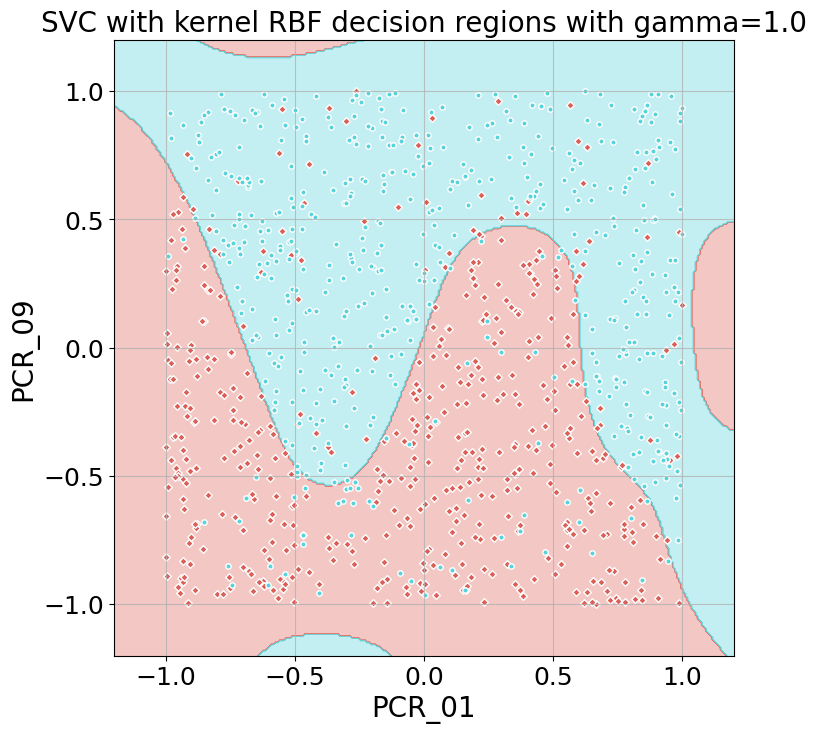

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


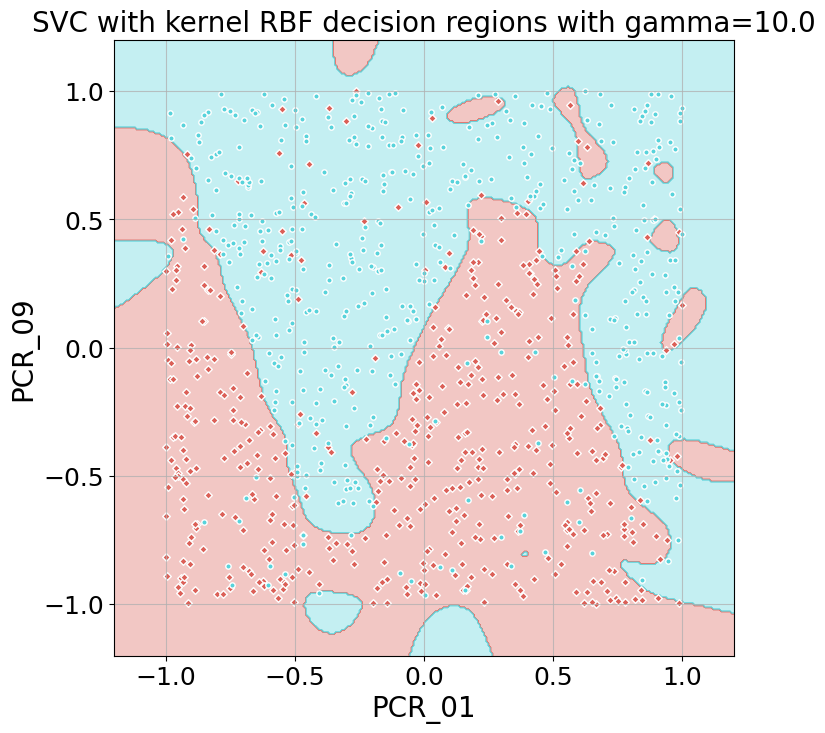

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


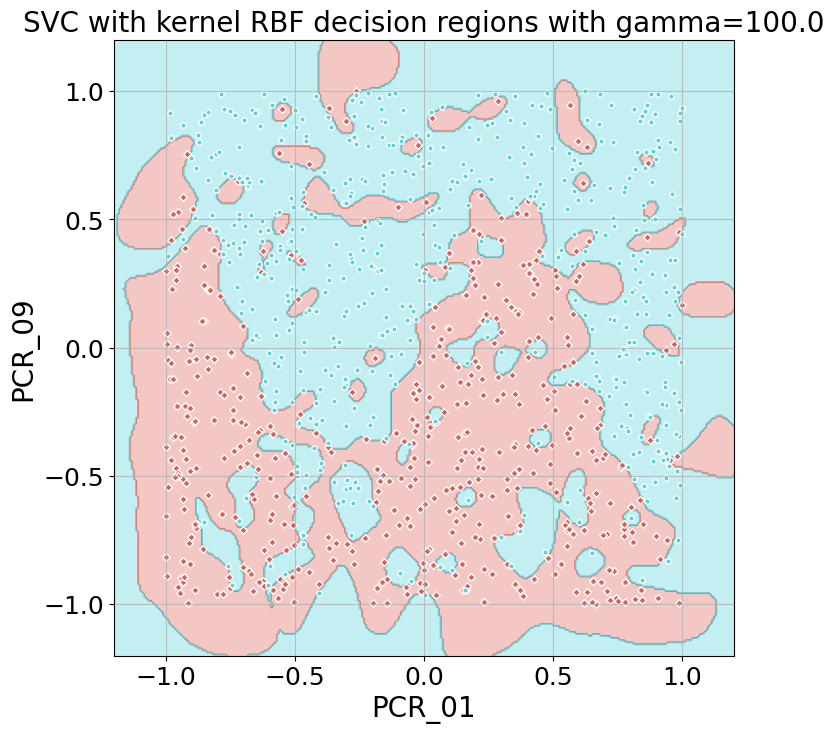

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


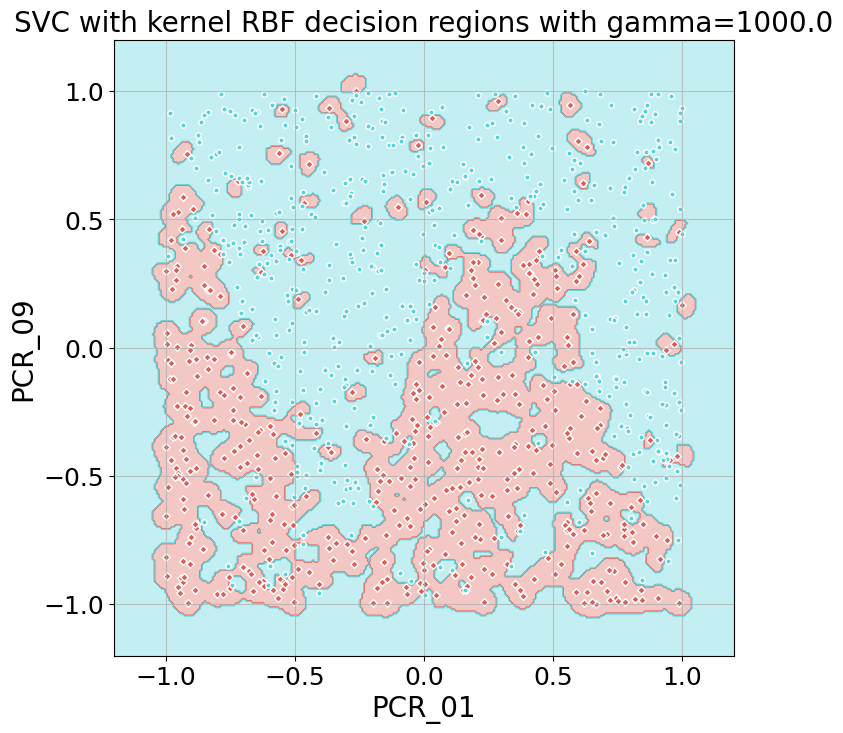

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


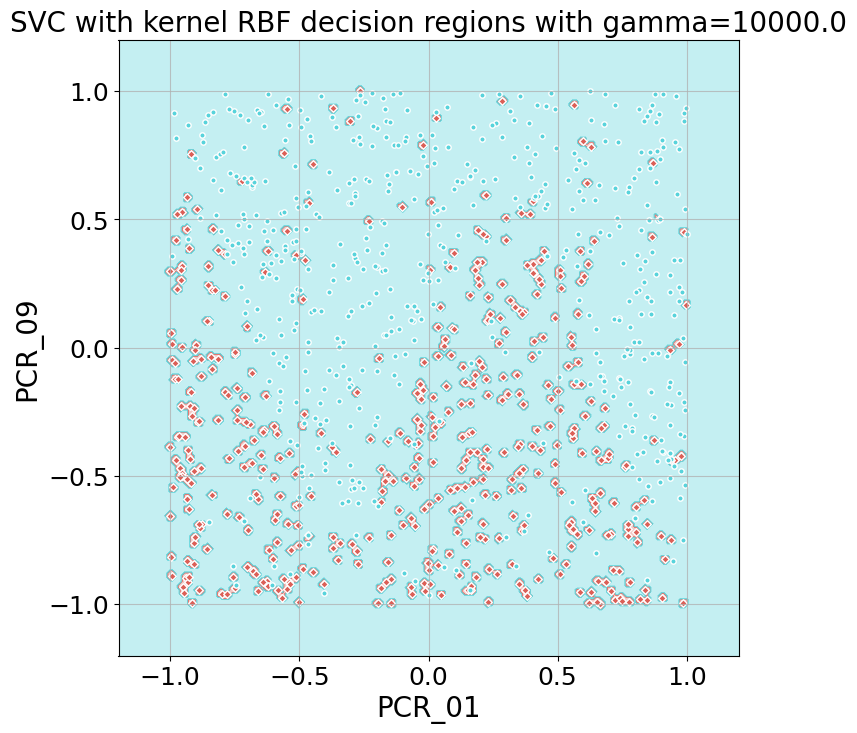

In [ ]:
# Task before Q16 + Q16
from sklearn.svm import SVC

C = 1e4
for gamma in np.logspace(-4, 4, 9):
  svc = SVC(C=C, gamma=gamma)
  svc.fit(X_train, Y_train)
  visualize_clf(svc,X_train,Y_train,f"SVC with kernel RBF decision regions with gamma={gamma}",f"PCR_01",f"PCR_09",marker_size=15)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

The index of the best validation accuracy is: 8
The gamma for the best validation accuracy is: 1.9306977288832496
The best validation accuracy is: 0.867
The training accuracy for the best validation accuracy is: 0.8758571428571429


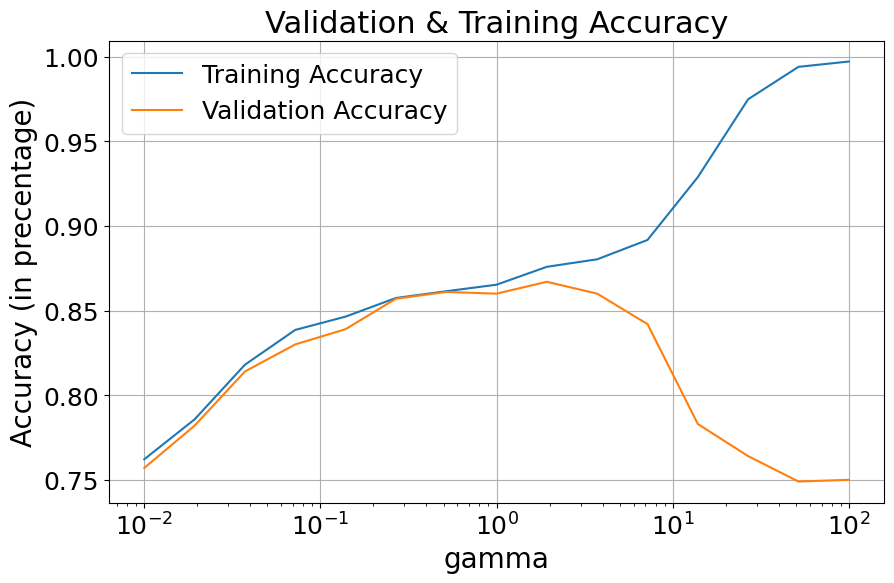

In [ ]:
# Q18
#Creating the list for the gamma values and the train/val accuracy lists
gamma_range = np.logspace(-2, 2, 15)
mean_training_accs = []
validation_accs = []


#Looping through the gamma values, and using cross validation to find the best gamma
for gamma in gamma_range:
  svc = SVC(C=1e4, gamma=gamma)
  cv_results = cross_validate(svc, X_train, Y_train, cv=8, return_train_score=True)
  mean_train_score = np.mean(cv_results['train_score'])
  mean_val_score = np.mean(cv_results['test_score'])
  mean_training_accs.append(mean_train_score)
  validation_accs.append(mean_val_score)

#Plotting the results and creating the graph
plt.figure(figsize=(10, 6))
plt.semilogx(gamma_range, mean_training_accs, label='Training Accuracy')
plt.semilogx(gamma_range, validation_accs, label='Validation Accuracy')
plt.xlabel('gamma')
plt.ylabel('Accuracy (in precentage)')
plt.title('Validation & Training Accuracy')
plt.legend()
plt.grid(True)

max_index = validation_accs.index(max(validation_accs))
#Printing the values
print("The index of the best validation accuracy is:", max_index)
print("The gamma for the best validation accuracy is:", gamma_range[max_index])
print("The best validation accuracy is:", validation_accs[max_index])
print("The training accuracy for the best validation accuracy is:", mean_training_accs[max_index])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


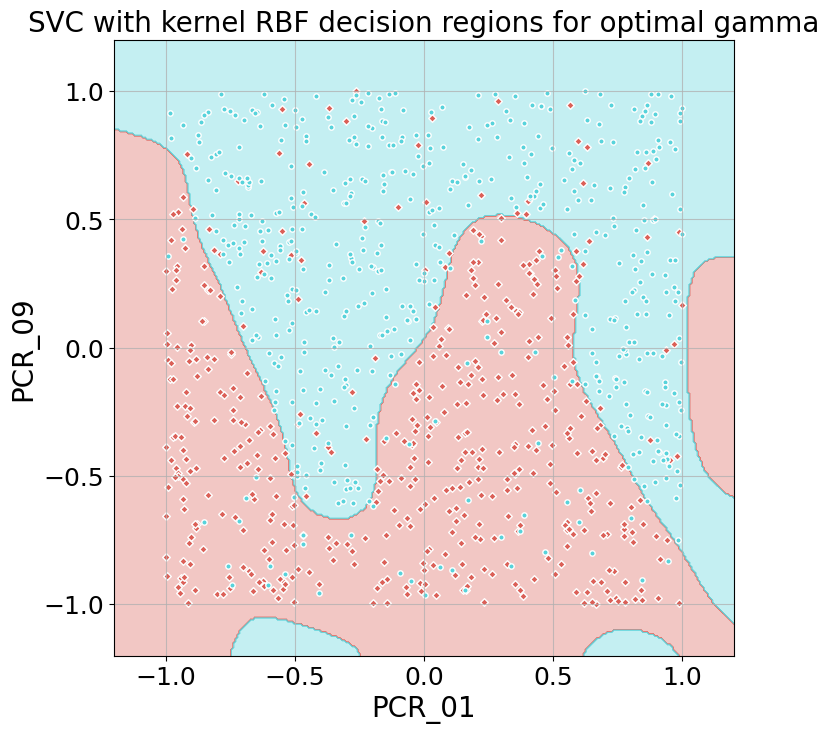

The model's test accuracy: 0.884


In [ ]:
# Q19
#Fitting the model with the optimal gamma hyperparameter
optimal_gamma = 1.9306977288832496
C = 1e4
rbf_svc = SVC(C=C, gamma=optimal_gamma)
rbf_svc.fit(X_train,Y_train)

#Plotting the decision regions for the final model
visualize_clf(rbf_svc,X_train,Y_train,f"SVC with kernel RBF decision regions for optimal gamma",f"PCR_01",f"PCR_09",marker_size=15)
test_acc = rbf_svc.score(X_test,Y_test)
print(f"The model's test accuracy: {test_acc}")